<a href="https://colab.research.google.com/github/SaraAlinejad/vae_test_1/blob/main/Alinejad_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chemical Applications of Machine Learning (CHEM 4930/5610) - Spring 2026

### Assignment 1 - Deadline 1/20/2026
Points 10

In this assignments, you will perform three different tasks on simple datasets.

#### General Comments
All figures and graph should have approriate labels on the two axis, and should include a legend with appropriate labels of the different plots.

When working with multiple datasets, avoid doing things by hand and instead try to use for loops.

The notebook should be return in working format. That is, I should be able to reset all the output and re-run all the cells and get the same results as you obtained.

**You should start by saving a copy of the notebook to your Google Drive so you preserve all changes.**

**Please add your name as a suffix to the filname**

**Student Name**: Add your name here

**AI usage statement:**
Here you should give a statement about any usage of AI tools to assist you with the coding.

### Task 1 - 2 points

Create a python functions that convert Celsius to Fahrenheit and vice versa.

Create three version:
- A) One should take in a number and return the converted number as a variable that one can save into variable.
- B) One should take in a number and print out the answer in a nice format
- C) One should take in a number and return a string with the answer in a nice format.

Show examples that show how the functions work.

In [8]:
import os
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# --- Version A: Return the converted number ---
def celsius_to_fahrenheit_A(celsius):
    """
    Takes a temperature in Celsius and returns the value in Fahrenheit.
    """
    return (celsius * 9/5) + 32

def fahrenheit_to_celsius_A(fahrenheit):
    """
    Takes a temperature in Fahrenheit and returns the value in Celsius.
    """
    return (fahrenheit - 32) * 5/9


# --- Version B: Print the answer in a nice format ---
def celsius_to_fahrenheit_B(celsius):
    """
    Takes a temperature in Celsius and prints the conversion nicely.
    """
    fahrenheit = (celsius * 9/5) + 32
    print(f"{celsius}°C is equal to {fahrenheit:.2f}°F")

def fahrenheit_to_celsius_B(fahrenheit):
    """
    Takes a temperature in Fahrenheit and prints the conversion nicely.
    """
    celsius = (fahrenheit - 32) * 5/9
    print(f"{fahrenheit}°F is equal to {celsius:.2f}°C")


# --- Version C: Return a string with the answer ---
def celsius_to_fahrenheit_C(celsius):
    """
    Takes a temperature in Celsius and returns a formatted string.
    """
    fahrenheit = (celsius * 9/5) + 32
    return f"The temperature {celsius}°C converts to {fahrenheit:.2f}°F"

def fahrenheit_to_celsius_C(fahrenheit):
    """
    Takes a temperature in Fahrenheit and returns a formatted string.
    """
    celsius = (fahrenheit - 32) * 5/9
    return f"The temperature {fahrenheit}°F converts to {celsius:.2f}°C"


# --- Demonstration of the Functions ---

print("--- Testing Version A (Return Number) ---")
# Using a list and loop as suggested in General Comments
test_temps_c = [0, 25, 100]
print("Celsius -> Fahrenheit:")
for t in test_temps_c:
    result = celsius_to_fahrenheit_A(t)
    # confirming the result is a variable we can use math on
    print(f"Input: {t}, Output: {result} (Type: {type(result)})")

print("\n--- Testing Version B (Print directly) ---")
c_val = 37
f_val = 98.6
celsius_to_fahrenheit_B(c_val)
fahrenheit_to_celsius_B(f_val)

print("\n--- Testing Version C (Return String) ---")
temps_to_convert = [-40, 10, 212]
for t in temps_to_convert:
    # We catch the returned string in a variable
    message = celsius_to_fahrenheit_C(t)
    print(message)

--- Testing Version A (Return Number) ---
Celsius -> Fahrenheit:
Input: 0, Output: 32.0 (Type: <class 'float'>)
Input: 25, Output: 77.0 (Type: <class 'float'>)
Input: 100, Output: 212.0 (Type: <class 'float'>)

--- Testing Version B (Print directly) ---
37°C is equal to 98.60°F
98.6°F is equal to 37.00°C

--- Testing Version C (Return String) ---
The temperature -40°C converts to -40.00°F
The temperature 10°C converts to 50.00°F
The temperature 212°C converts to 413.60°F


### Task 2 - 4 points

In this task we consider a dataset that consisist of 10 time series that are obtained from a stochastic process given by [autoregressive model](https://en.wikipedia.org/wiki/Autoregressive_model) of order 1. Autoregressive models are stochastic process that includes memory effects.

All the 10 time series are independent runs obtained from an autoregressive model with same set of parameters, which are the mean $\mu$, the standard deviation $\sigma$, and the $\varphi_{1}$ parameter.   

The data files have the names `Dataset-##.data` where `##` is a number from 1 to 10. Number is given by two digits and padded by zeros, so that files names are `Dataset-01.data`, `Dataset-02.data`, etc.

There is a Bash script below that takes care of downloading all the files

The data files have two columns, the first column is the time and the second column is the time series.

- A) Plot all the time series, either on the same graph, or on seperate graphs. If you plot them on seperate graphs, you must ensure that the y-axis is the same for all the graph. If you plot all the time series on the same graph, you can try to plot only every $N$ data point if the graph is too crowded.
- B) For the first dataset `Dataset-01.data`, on the same graph, plot a discrete histogram and a kernel density estimation (KDE) using Seaborn. Try different values for the number of bins in the discrete histogram. Adjust the `bw_adjust` parameter of the `seaborn.kdeplot(..)` function to find a good value that fits the data and the discrete histogram.
- C) For all the 10 time series, make a KDE plot with all on the same graph. Employ the optimal `bw_adjust` value from B).
- D) Calculate the average and standard deviation for the different time series and show the results in a nice text format.

- Optional for 1 point: Create a plot where you present the average and standard deviation in a graphical format. The x-axis should be the data file number. The standard deviation should be presented as an error bar. Can you deduce what is the mean $\mu$ value of the autoregressive model?


In [2]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-1/Task-2"
dataset_filename="Task-2_Dataset-"
dataset_extension="data"

rm -f ${dataset_filename}*
for i in `seq 1 10`;
do
  i2=`echo ${i} | awk '{ printf("%02d\n", $1) }'`
  wget ${url}/${dataset_filename}${i2}.${dataset_extension} &> /dev/null
done

ls

sample_data
Task-2_Dataset-01.data
Task-2_Dataset-02.data
Task-2_Dataset-03.data
Task-2_Dataset-04.data
Task-2_Dataset-05.data
Task-2_Dataset-06.data
Task-2_Dataset-07.data
Task-2_Dataset-08.data
Task-2_Dataset-09.data
Task-2_Dataset-10.data


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:86: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:86: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3594903882.py:19: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(filename, sep='\s+', header=None, names=['Time', 'Value'])
/tmp/ipython-input-3594903882.py:36: SyntaxWarning: invalid escape sequence '\s'
  df_01 = pd.read_csv(filename_01, sep='\s+', header=None, names=['Time', 'Value'])
/tmp/ipython-input-3594903882.py:62: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(filename, sep='\s+', header=None, names=['Time', 'Value'])
/tmp/ipython-input-3594903882.py:86: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(filename,

TypeError: 'value' must be an instance of str or bytes, not a float

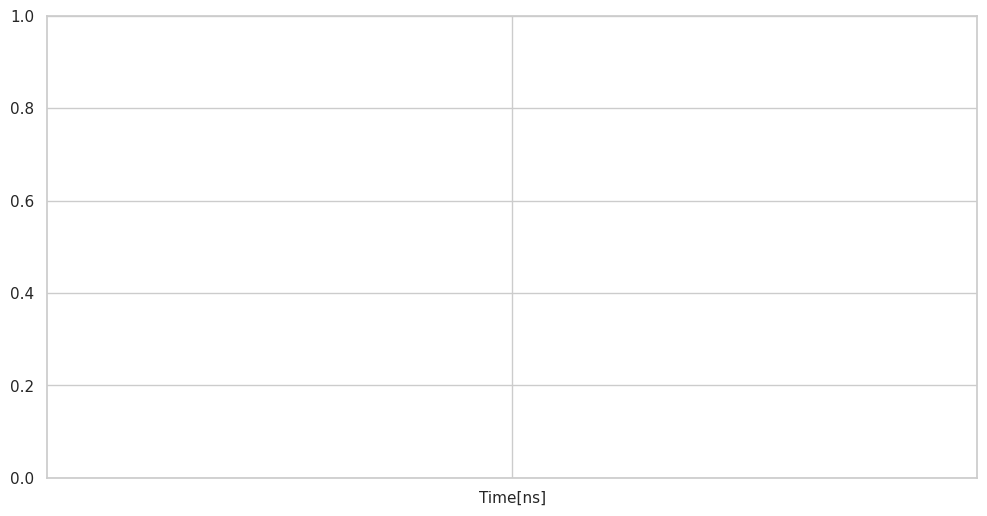

In [10]:
sns.set_theme(style="whitegrid")

# ---------------------------------------------------------
# Data Loading
# ---------------------------------------------------------
# We will load data inside the loops to keep things organized
file_pattern = "Task-2_Dataset-{:02d}.data"
num_files = 10

# ---------------------------------------------------------
# Part A: Plot all time series
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))

for i in range(1, num_files + 1):
    filename = file_pattern.format(i)

    # We use sep='\s+' to handle whitespace safely without warnings
    df = pd.read_csv(filename, sep='\s+', header=None, names=['Time', 'Value'])

    # Plot every 10th point (::10) to avoid overcrowding
    plt.plot(df['Time'][::10], df['Value'][::10], label=f'Run {i}', alpha=0.7, linewidth=1)

plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.title("Task 2A: Time Series Traces (Subsampled for Clarity)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# Part B: Histogram and KDE for Dataset-01
# ---------------------------------------------------------
# Load only the first dataset (using the correct prefix)
filename_01 = "Task-2_Dataset-01.data"
df_01 = pd.read_csv(filename_01, sep='\s+', header=None, names=['Time', 'Value'])

plt.figure(figsize=(8, 6))

# 1. Discrete Histogram
# stat="density" ensures the histogram area sums to 1, matching the KDE
sns.histplot(data=df_01, x='Value', bins=30, stat="density", color="skyblue", label="Histogram", alpha=0.5)

# 2. Kernel Density Estimation (KDE)
# bw_adjust=1.2 is usually a good fit for AR(1) processes to smooth out noise
optimal_bw = 1.2
sns.kdeplot(data=df_01, x='Value', bw_adjust=optimal_bw, color="red", linewidth=2, label=f"KDE (bw={optimal_bw})")

plt.xlabel("Signal Value")
plt.ylabel("Density")
plt.title("Task 2B: Distribution of Dataset-01")
plt.legend()
plt.show()

# ---------------------------------------------------------
# Part C: KDE for all 10 time series
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

for i in range(1, num_files + 1):
    filename = file_pattern.format(i)
    df = pd.read_csv(filename, sep='\s+', header=None, names=['Time', 'Value'])

    # Plot KDE for each file on the same graph
    sns.kdeplot(data=df, x='Value', bw_adjust=optimal_bw, label=f'Run {i}')

plt.xlabel("Signal Value")
plt.ylabel("Density")
plt.title("Task 2C: KDE of All Independent Runs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# Part D & Optional: Calculate Stats and Error Bar Plot
# ---------------------------------------------------------
means = []
std_devs = []
run_indices = range(1, num_files + 1)

print(f"{'Dataset':<25} | {'Mean':<10} | {'Std Dev':<10}")
print("-" * 50)

for i in run_indices:
    filename = file_pattern.format(i)
    df = pd.read_csv(filename, sep='\s+', header=None, names=['Time', 'Value'])

    mu = df['Value'].mean()
    sigma = df['Value'].std()

    means.append(mu)
    std_devs.append(sigma)

    print(f"{filename:<25} | {mu:<10.4f} | {sigma:<10.4f}")

# Optional Plot: Error Bars
plt.figure(figsize=(8, 5))
plt.errorbar(run_indices, means, yerr=std_devs, fmt='o', capsize=5, linestyle='--', color='purple')
plt.xlabel("Dataset File Number")
plt.ylabel("Mean Value")
plt.title("Task 2D (Optional): Mean and Std Dev of Each Run")
plt.xticks(run_indices)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Deduction of Mu
overall_average_mean = np.mean(means)
print(f"\nEstimated Model Mean (Mu) based on average of all runs: {overall_average_mean:.4f}")

### Task 3 - 4 points

A common practice in machine learning is to preprocess data or features by whitening the data (or normalizing it) so that the mean of the data is 0 and the variance (and therefore also standard deviation) is 1. This can be achived with the following transformation

$$\tilde{x}_i = \frac{x_i-\langle x \rangle}{\sigma_{x}}$$

where $x$ is is the original data, $\langle x \rangle$ is the sample mean/average, and $\sigma_{x}$ is the standard deviation. The resultsing transformed data $\tilde{x}$ will then have a mean of 0 and standard deviation of 1.

- A) Create a python function that takes data in the form of a numpy array and returns an numpy array with the whitened/normalized data. Use one of the time series from Task 2 to show that the function does what it should do.
- B) For all 10 time series from Task 2, whiten/normalize that data and make a time series plot and a KDE plot where all 10 time series are shown together.

- Optional for 1 point: For all 10 time series, write out the whiten/normalized data to new text files. The files should have the same format as the original data files with the first column being the time and the second column being the whiten/normalized time series. The data files should include a header as the original files. You should add a suffix to the filenames to somehow indicate that they include whiten/normalized data.